In [ ]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import seaborn as sns #visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
import random
import xlrd
import matplotlib.pyplot as plt
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from datetime import datetime

In [ ]:
data_df = pd.read_excel('datav3.xlsx')

In [ ]:
data_df_copy = data_df.copy()

Normalized distribution of each class per feature and plotted difference between positive and negative frequencies. Positive values imply this category favors clients that will subscribe and negative values categories that favor not buying the product.

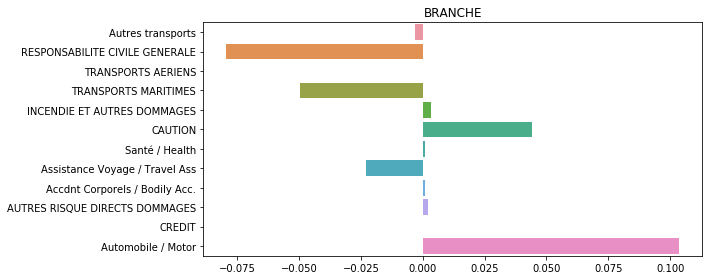

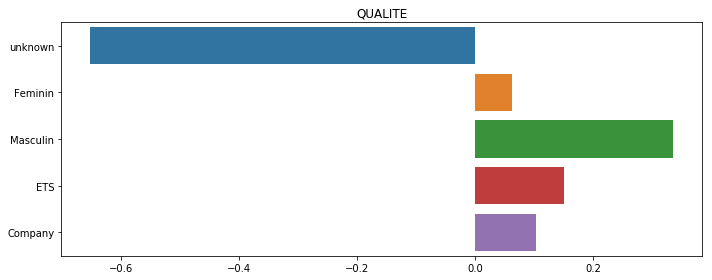

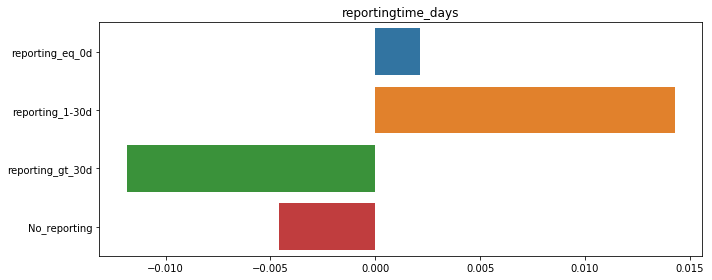

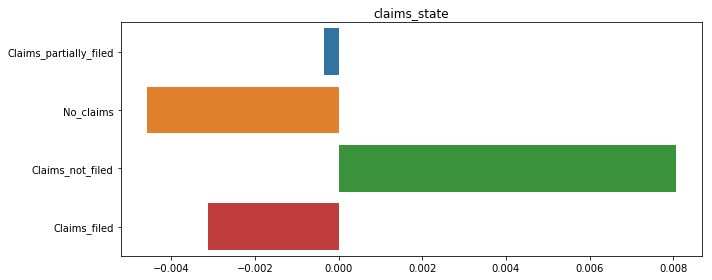

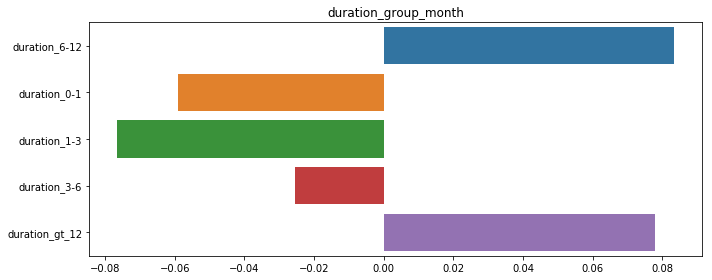

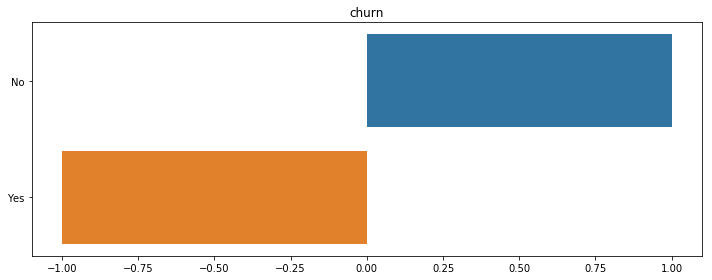

In [ ]:
categorcial_variables = ['BRANCHE','QUALITE' ,'reportingtime_days','claims_state','duration_group_month','churn']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    #Returns counts of unique values for each outcome for each feature.
    pos_counts = data_df.loc[data_df.churn.values == 'No', col].value_counts() 
    neg_counts = data_df.loc[data_df.churn.values == 'Yes', col].value_counts()
    
    all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
    #Counts of how often each outcome was recorded.
    freq_pos = (data_df.churn.values == 'No').sum()
    freq_neg = (data_df.churn.values == 'Yes').sum()
    
    pos_counts = pos_counts.to_dict()
    neg_counts = neg_counts.to_dict()
    
    all_index = list(all_counts)
    all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

    sns.barplot(all_counts, all_index)
    plt.title(col)
    plt.tight_layout()

In [ ]:
# Some of the following feature have been creted for the purpose of analysis 
# and no need to add them in our main features 
to_drop = ['type', 'LIBECATE','policyduration', 'claims_year', 'reportingtime_days']
data_df.drop(to_drop, axis=1, inplace=True)

## Data preprocessing

In [ ]:
newdata = data_df.copy()
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#customer col
Id_col     = ['ASSURE']

#Target columns
target_col = ["churn"]
# retrieve columns
#numerical columns
num_cols   =  ['beginyear_policy','endyear_policy', 'beginmonth_policy',
               'endmonth_policy','PRIMTOTA',]

#categorical columns
cat_cols   = [x for x in data_df.columns if x not in num_cols + target_col + Id_col]
# label 
target_dict = {'No':0,'Yes':1}
data_df['churn'] = data_df.churn.map(target_dict)
#Label encoding
encoder = LabelEncoder()
# encode the id column
data_df[Id_col] = encoder.fit_transform(data_df[Id_col])
    
# Ordinal encoding
to_dum = ['claims_state','duration_group_month']

#Columns more than 5 values
multi_card =  [x for x in data_df.columns if x not in num_cols + target_col + Id_col + to_dum]

# This variable has been created for the analysis
#durationgroup_dict = {'duration_0-1':4,'duration_1-3':3, 'duration_6-12':2, 'duration_3-6':1, 
  #    'duration_gt_12':0}
#data_df['duration_group_month'] = data_df.duration_group_month.map(durationgroup_dict)

#claimsstate_dict ={'Claims_filed':0, 'No_claims':3, 'Claims_not_filed':1,
 #      'Claims_partially_filed':2}
#data_df['claims_state'] = data_df.claims_state.map(claimsstate_dict)

# dummy encoding for variable with lower cardinality 
data_df = pd.get_dummies(data_df, columns=to_dum)
# label encoding for variable with multiple cardinality
for i in multi_card:
    data_df[i] = encoder.fit_transform(data_df[i])

#Scaling Numerical columns
std = MinMaxScaler()
scaled = std.fit_transform(data_df[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)



#dropping original values merging scaled values for numerical columns
df_data_og = data_df.copy()
data_df = data_df.drop(columns = num_cols,axis = 1)
data_df = data_df.merge(scaled,left_index=True,right_index=True,how = "left")

In [ ]:
data_df.head()

,ASSURE,BRANCHE,ACTIVITE,PROFESSION,QUALITE,BUREAU,churn,claims_state_Claims_filed,claims_state_Claims_not_filed,claims_state_Claims_partially_filed,...,duration_group_month_duration_0-1,duration_group_month_duration_1-3,duration_group_month_duration_3-6,duration_group_month_duration_6-12,duration_group_month_duration_gt_12,beginyear_policy,endyear_policy,beginmonth_policy,endmonth_policy,PRIMTOTA
0,42369,3,62,405,0,9,1,1,0,0,...,0,1,0,0,0,0.073684,0.000000,0.000000,0.181818,0.250873
1,7857,3,62,342,0,21,1,1,0,0,...,0,1,0,0,0,0.073684,0.000000,0.000000,0.181818,0.250904
2,8895,3,5,19,0,24,1,1,0,0,...,0,0,0,1,0,0.073684,0.011236,0.090909,0.090909,0.250877
3,38391,3,62,342,0,21,1,0,0,0,...,0,1,0,0,0,0.073684,0.000000,0.090909,0.272727,0.250897
4,36492,9,66,381,0,35,1,1,0,0,...,0,0,1,0,0,0.073684,0.000000,0.090909,0.545455,0.250798


## Pearson correlation

In [ ]:
#correlation
correlation = data_df.corr()

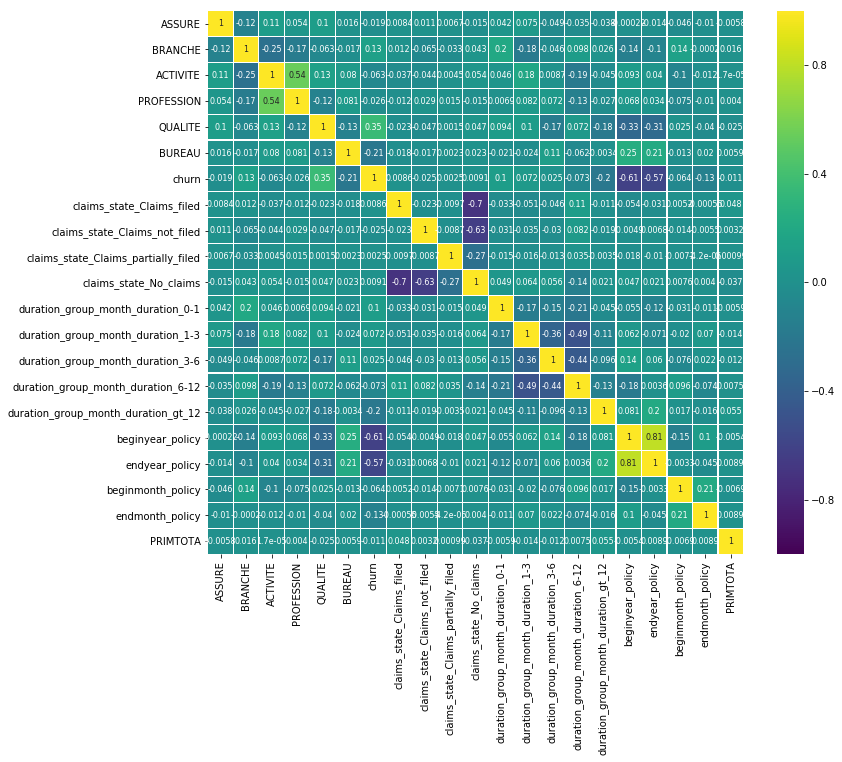

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=False);

* PROFESSION and activite have basically the same meaning, so we will drop Profession from our data
* 

In [ ]:
print( 'n profession' , data_df['PROFESSION'].nunique())
print( 'n activite' , data_df['ACTIVITE'].nunique())

n profession 478
n activite 88


In [ ]:
to_drop = ['PROFESSION']
data_df.drop(to_drop, axis=1, inplace=True)

# save the file

In [ ]:
data_df.to_csv('data_encode.csv', index=False)

In [ ]:
da = pd.read_csv('data_encode.csv')

In [ ]:
da.head()

,ASSURE,LIBECATE,ACTIVITE,QUALITE,BUREAU,churn,claims_state_Claims_filed,claims_state_Claims_not_filed,claims_state_Claims_partially_filed,claims_state_No_claims,duration_group_month_duration_0-1,duration_group_month_duration_1-3,duration_group_month_duration_3-6,duration_group_month_duration_6-12,duration_group_month_duration_gt_12,beginyear_policy,endyear_policy,beginmonth_policy,endmonth_policy,PRIMTOTA
0,42369,27,62,0,9,1,1,0,0,0,0,1,0,0,0,0.073684,0.000000,0.000000,0.181818,0.250873
1,7857,27,62,0,21,1,1,0,0,0,0,1,0,0,0,0.073684,0.000000,0.000000,0.181818,0.250904
2,8895,27,5,0,24,1,1,0,0,0,0,0,0,1,0,0.073684,0.011236,0.090909,0.090909,0.250877
3,38391,55,62,0,21,1,0,0,0,1,0,1,0,0,0,0.073684,0.000000,0.090909,0.272727,0.250897
4,36492,34,66,0,35,1,1,0,0,0,0,0,1,0,0,0.073684,0.000000,0.090909,0.545455,0.250798


In [ ]:
da.shape

(86633, 20)

In [ ]:
# intialise data of lists
lr=[0.8785133 , 0.94967392, 0.94776938, 0.91931667, 0.8823088 ] 
lgb=[0.99405552, 0.99694119, 0.99272811, 0.99301668, 0.99232323]
data = {'lr':lr, 'lgbm': lgb} 
  
# Create DataFrame 
df = pd.DataFrame(data) 
  
# Print the output. 
print(df) 

         lr      lgbm
0  0.878513  0.994056
1  0.949674  0.996941
2  0.947769  0.992728
3  0.919317  0.993017
4  0.882309  0.992323


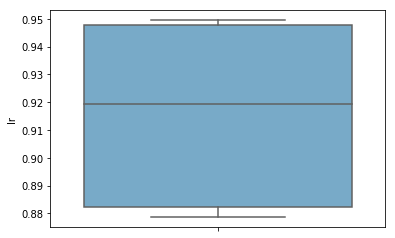

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot( y=df['lr'], palette="Blues");
plt.show()

In [ ]:
[0.99405552 0.99694119 0.99272811 0.99301668 0.99232323] -lgbm
[0.8785133  0.94967392 0.94776938 0.91931667 0.8823088 ] - LR